<b> Packages Used

In [29]:
pkgs <- c("party","Boruta")

<b> Install Packages

In [27]:
for (pkg in pkgs) {
  if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }
}

<b> Load Packages

In [57]:
lapply(pkgs, library, character.only = TRUE)

[[1]]
 [1] "Boruta"      "ranger"      "party"       "strucchange" "sandwich"   
 [6] "zoo"         "modeltools"  "stats4"      "mvtnorm"     "grid"       
[11] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[16] "methods"     "base"       

[[2]]
 [1] "Boruta"      "ranger"      "party"       "strucchange" "sandwich"   
 [6] "zoo"         "modeltools"  "stats4"      "mvtnorm"     "grid"       
[11] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[16] "methods"     "base"

<b> Set Working Directory

In [59]:
setwd("~/Workspace/prototypes/data-science/data")

<b> Load Data Load the data into a data frame with columns and rows
    We specify the file path, separator, whether the CSV/tsv file's 1st row is clumn names, and how to treat strings.

In [87]:
#original_data <- read.table(file = 'sampleData.tsv', sep = '\t', header = TRUE, stringsAsFactors = FALSE)
original_data <- read.csv2("sampleData.tsv", sep="\t", header=TRUE, stringsAsFactors = FALSE)

<b> To Get Number of Rows and Columns </b>
* dim(dataset) to retrieve both n and k, you can also use nrow(df) and ncol(df) (and even NROW(df) and NCOL(df)).
* The difference between NROW() and NCOL() and their lowercase variants (ncol() and nrow()) is that the lowercase versions will only work for objects that have dimensions (arrays, matrices, data frames). 
* The uppercase versions will work with vectors, which are treated as if they were a 1 column matrix, and are robust if you end up subsetting your data such that R drops an empty dimension.

In [88]:
dim(original_data) # Number of rows & columns 
nrow(original_data) #  number of rows 
ncol(original_data) # number of columns

[1] 10139   237

[1] 10139

[1] 10139

[1] 237

[1] 237

<b> To Get Number of Rows and Columns after Omitting the NA</b>
* na.omit(<data_frame>)

In [93]:
dataset <- na.omit(original_data)
dim(dataset)
nrow(na.omit(original_data)) # number of rows after omitting the NA
ncol(na.omit(original_data)) # number of columns after omitting the NA

[1] 10139   237

[1] 10139

[1] 237

<b> To get Rows in a DataFrame after omitting NA
* Alternatively, use complete.cases() and sum it (complete.cases() returns a logical vector [TRUE or FALSE] indicating if any observations are NA for any rows.

In [ ]:
sum(complete.cases(original_data)) # number of rows after omitting the NA

<b> Print Column Names or Features

In [103]:
colnames(original_data)

[1] "ibsa_main_sample_set.innovation_challenge_key"                                    
  [2] "ibsa_main_sample_set.renewed_yorn"                                                
  [3] "ibsa_main_sample_set.instance_id"                                                 
  [4] "ibsa_main_sample_set.contract_line_id"                                            
  [5] "ibsa_main_sample_set.minor_line_yorn"                                             
  [6] "ibsa_main_sample_set.major_line_instance_id"                                      
  [7] "ibsa_main_sample_set.installation_date"                                           
  [8] "ibsa_main_sample_set.product_sales_order_type"                                    
  [9] "ibsa_main_sample_set.product_purchase_order_type"                                 
 [10] "ibsa_main_sample_set.instance_status"                                             
 [11] "ibsa_main_sample_set.product_transaction_type"                                    
 [12] "ibsa_main_sample_set.installed_product_type"                                      
 [13] "ibsa_main_sample_set.installed_product_component_yorn"                            
 [14] "ibsa_main_sample_set.component_type"                                              
 [15] "ibsa_main_sample_set.scdc_product_yorn"                                           
 [16] "ibsa_main_sample_set.service_classification"                                      
 [17] "ibsa_main_sample_set.service_contract_last_renewal_date"                          
 [18] "ibsa_main_sample_set.service_contract_classification"                             
 [19] "ibsa_main_sample_set.service_contract_process_type"                               
 [20] "ibsa_main_sample_set.contract_line_multi_year_discount_yorn"                      
 [21] "ibsa_main_sample_set.contract_line_route_to_market_code"                          
 [22] "ibsa_main_sample_set.contract_line_duration_in_days"                              
 [23] "ibsa_main_sample_set.contract_line_start_date"                                    
 [24] "ibsa_main_sample_set.contract_line_end_date"                                      
 [25] "ibsa_main_sample_set.contract_line_create_date"                                   
 [26] "ibsa_main_sample_set.contract_line_sales_motion_code"                             
 [27] "ibsa_main_sample_set.marketing_program_name"                                      
 [28] "ibsa_main_sample_set.default_multi_year_discount_yorn"                            
 [29] "ibsa_main_sample_set.service_contract_discount_percentage"                        
 [30] "ibsa_main_sample_set.low_dollar_contract_yorn"                                    
 [31] "ibsa_main_sample_set.warranty_type"                                               
 [32] "ibsa_main_sample_set.warranty_contract_line_start_date"                           
 [33] "ibsa_main_sample_set.warranty_contract_line_end_date"                             
 [34] "ibsa_main_sample_set.contract_line_source_business_process_name"                  
 [35] "ibsa_main_sample_set.contract_line_repair_service_order_level"                    
 [36] "ibsa_main_sample_set.contract_line_reaction_time_code"                            
 [37] "ibsa_main_sample_set.product_sales_channel_code"                                  
 [38] "ibsa_main_sample_set.product_bookings_measure_transaction_type"                   
 [39] "ibsa_main_sample_set.product_adjustment_type"                                     
 [40] "ibsa_main_sample_set.product_channel_bookings_yorn"                               
 [41] "ibsa_main_sample_set.pos_bookings_measure_transaction_type"                       
 [42] "ibsa_main_sample_set.pos_adjustment_type"                                         
 [43] "ibsa_main_sample_set.product_route_to_market"                                     
 [44] "ibsa_main_sample_set.service_channel_bookings_yorn"                               
 [45] "ibsa_main_sample_set.service_route_

<b> Print Summary of the Features(Columns)

<b> Explore Data - Summarize Data

In [104]:
summary(original_data)

 ibsa_main_sample_set.innovation_challenge_key
 Min.   :     78                              
 1st Qu.:1122064                              
 Median :3320860                              
 Mean   :3426228                              
 3rd Qu.:5599858                              
 Max.   :7896509                              
 ibsa_main_sample_set.renewed_yorn ibsa_main_sample_set.instance_id
 Length:10139                      Length:10139                    
 Class :character                  Class :character                
 Mode  :character                  Mode  :character                
                                                                   
                                                                   
                                                                   
 ibsa_main_sample_set.contract_line_id ibsa_main_sample_set.minor_line_yorn
 Length:10139                          Length:10139                        
 Class :character                      Clas

The head() and tail() functions default to 6 rows, but we can adjust the number of rows using the "n = " argument

In [106]:
head(original_data, n=5)
tail(original_data, n=5)

ibsa_main_sample_set.innovation_challenge_key,ibsa_main_sample_set.renewed_yorn,ibsa_main_sample_set.instance_id,ibsa_main_sample_set.contract_line_id,ibsa_main_sample_set.minor_line_yorn,ibsa_main_sample_set.major_line_instance_id,ibsa_main_sample_set.installation_date,ibsa_main_sample_set.product_sales_order_type,ibsa_main_sample_set.product_purchase_order_type,ibsa_main_sample_set.instance_status,⋯,ibsa_main_sample_set.service_distributor_base_theater_name,ibsa_main_sample_set.service_distributor_base_distributor_normalized_name,ibsa_main_sample_set.contract_line_net_usd_amount,ibsa_main_sample_set.product_net_price,ibsa_main_sample_set.sales_node_renewal_rate,ibsa_main_sample_set.customer_renewal_rate,ibsa_main_sample_set.partner_renewal_rate,ibsa_main_sample_set.product_renewal_rate,ibsa_main_sample_set.service_sales_node_installed_base_sales_node_renewal_rate,ibsa_main_sample_set.service_partner_installed_base_partner_renewal_rate
6377987,N,CED2046F45038B444E46B39BDEFCE9CB7723BC3A18B144A7766C19F22EB30D2E,025B4B93C290BB30D46E3BCFD9A2438A83C8C6ECE78F5F3CB7A1FA85218AD24E,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
6019776,N,C32E506BCBC56AFBA803716D76E630A9141FB86ABF80BFB24B1CF967C87A2AA9,85F875950DAE9B6F3C835987B1CB594FD66FCFD26B9656FC6BC0B07236E6F09F,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
380293,N,0C57CB6B18F10E9710D1FD08C579732E6D8497BB11037AF3FEA027AAC4725923,FDDE9B6C347CD673AA030233B2E77E47ADE969CA7A66EFB4BAABDE04FAA4026C,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
4366777,N,8D9CEFB3C70524AF2FD2B9543FC0289766B4298366BB816109C86C1EE3A11862,EBE5DDA92260B430175EE4B240790D34D0A8D15097B9A1DC7BA6CC841853C114,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
7840051,N,FE1BD8A298629EC753E9BD185CA2793C07188CEF05F4B764FA943EFBC32E6460,487471F424BE75F4E504859B7686E4BE23F05252B79A6AC0CD4F51B38AC442F8,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53


,ibsa_main_sample_set.innovation_challenge_key,ibsa_main_sample_set.renewed_yorn,ibsa_main_sample_set.instance_id,ibsa_main_sample_set.contract_line_id,ibsa_main_sample_set.minor_line_yorn,ibsa_main_sample_set.major_line_instance_id,ibsa_main_sample_set.installation_date,ibsa_main_sample_set.product_sales_order_type,ibsa_main_sample_set.product_purchase_order_type,ibsa_main_sample_set.instance_status,⋯,ibsa_main_sample_set.service_distributor_base_theater_name,ibsa_main_sample_set.service_distributor_base_distributor_normalized_name,ibsa_main_sample_set.contract_line_net_usd_amount,ibsa_main_sample_set.product_net_price,ibsa_main_sample_set.sales_node_renewal_rate,ibsa_main_sample_set.customer_renewal_rate,ibsa_main_sample_set.partner_renewal_rate,ibsa_main_sample_set.product_renewal_rate,ibsa_main_sample_set.service_sales_node_installed_base_sales_node_renewal_rate,ibsa_main_sample_set.service_partner_installed_base_partner_renewal_rate
10135,1789558,Y,39F398F12962E4BC24F5A7D49D32EFD9B449BC24DE927E79E54E35CD15C4084B,5D91ADDE5C330FED31755CB84DA82134C53621BF321F0CBF51CBFBF429DF0B06,Y,00F5D9D3A76F99C34097C876C0C79E8B7962E26B6FC59FBBF349B715A859E1D6,null,Promotion - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,65,NULL,41,86,144,65
10136,7199235,Y,E96E68AC804B82A99DC20597FF8C3B93CF026B96D07380CA78FE47108E767373,6901144B107A4977E9D65B2168DFCF2BF001BA3EE47E9B67E4607B19650535B8,Y,00F5D9D3A76F99C34097C876C0C79E8B7962E26B6FC59FBBF349B715A859E1D6,null,Promotion - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,65,NULL,41,59476,144,65
10137,29651,Y,00F5D9D3A76F99C34097C876C0C79E8B7962E26B6FC59FBBF349B715A859E1D6,CB6B4869A556791F84C0FEEFB390418633D3E3BFF0AA15D18A01F130BC076AF6,N,00F5D9D3A76F99C34097C876C0C79E8B7962E26B6FC59FBBF349B715A859E1D6,null,Promotion - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,1665,11098,NULL,NULL,NULL,NULL,NULL,NULL
10138,29650,Y,00F5D9D3A76F99C34097C876C0C79E8B7962E26B6FC59FBBF349B715A859E1D6,9C78A8CDBCA5FEC7AD30D76511E74CA866841E1B8EDEDDD071D70B228B4BB2F4,N,00F5D9D3A76F99C34097C876C0C79E8B7962E26B6FC59FBBF349B715A859E1D6,null,Promotion - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,695,11098,NULL,NULL,NULL,NULL,NULL,NULL
10139,29649,Y,00F5D9D3A76F99C34097C876C0C79E8B7962E26B6FC59FBBF349B715A859E1D6,6C9F8A207BD2919176A669E6055361894847F80B238450340CB03248A5B52ECB,N,00F5D9D3A76F99C34097C876C0C79E8B7962E26B6FC59FBBF349B715A859E1D6,null,Promotion - US,Resale,Latest-INSTALLED,⋯,N/A,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,1594,11098,65,NULL,41,77,144,65


<b> Explore Data - Check number of missing values

In [21]:
sapply(original_data, function(y) sum(is.na(y)))

ibsa_main_sample_set.innovation_challenge_key 
                                                                                0 
                                                ibsa_main_sample_set.renewed_yorn 
                                                                                0 
                                                 ibsa_main_sample_set.instance_id 
                                                                                0 
                                            ibsa_main_sample_set.contract_line_id 
                                                                                0 
                                             ibsa_main_sample_set.minor_line_yorn 
                                                                                0 
                                      ibsa_main_sample_set.major_line_instance_id 
                                                                                0 
                                           ibsa_main_sample_set.installation_date 
                                                                                0 
                                    ibsa_main_sample_set.product_sales_order_type 
                                                                                0 
                                 ibsa_main_sample_set.product_purchase_order_type 
                                                                                0 
                                             ibsa_main_sample_set.instance_status 
                                                                                0 
                                    ibsa_main_sample_set.product_transaction_type 
                                                                                0 
                                      ibsa_main_sample_set.installed_product_type 
                                                                                0 
                            ibsa_main_sample_set.installed_product_component_yorn 
                                                                                0 
                                              ibsa_main_sample_set.component_type 
                                                                                0 
                                           ibsa_main_sample_set.scdc_product_yorn 
                                                                                0 
                                      ibsa_main_sample_set.service_classification 
                                                                                0 
                          ibsa_main_sample_set.service_contract_last_renewal_date 
                                                                                0 
                             ibsa_main_sample_set.service_contract_classification 
                                                                                0 
                               ibsa_main_sample_set.service_contract_process_type 
                                                                                0 
                      ibsa_main_sample_set.contract_line_multi_year_discount_yorn 
                                                                                0 
                          ibsa_main_sample_set.contract_line_route_to_market_code 
                                                                                0 
                              ibsa_main_sample_set.contract_line_duration_in_days 
                                                                                0 
                                    ibsa_main_sample_set.contract_line_start_date 
                                                                                0 
                                      ibsa_main_sample_set.contract_line_end_date 
                                                                                0 
                                   ibsa_main_sample_

<b> Run Boruta Algorithm

In [22]:
set.seed(456)

In [45]:
boruta <- Boruta(ibsa_main_sample_set.renewed_yorn~., data = original_data, doTrace = 2)

 1. run of importance source...


Computing permutation importance.. Progress: 73%. Estimated remaining time: 11 seconds.


 2. run of importance source...


Computing permutation importance.. Progress: 72%. Estimated remaining time: 12 seconds.


 3. run of importance source...


Computing permutation importance.. Progress: 71%. Estimated remaining time: 12 seconds.


 4. run of importance source...


Computing permutation importance.. Progress: 67%. Estimated remaining time: 14 seconds.


 5. run of importance source...


Computing permutation importance.. Progress: 70%. Estimated remaining time: 13 seconds.


 6. run of importance source...


Computing permutation importance.. Progress: 71%. Estimated remaining time: 12 seconds.


 7. run of importance source...


Computing permutation importance.. Progress: 72%. Estimated remaining time: 11 seconds.


 8. run of importance source...


Computing permutation importance.. Progress: 72%. Estimated remaining time: 12 seconds.


 9. run of importance source...


Computing permutation importance.. Progress: 72%. Estimated remaining time: 12 seconds.


 10. run of importance source...


Computing permutation importance.. Progress: 72%. Estimated remaining time: 12 seconds.


 11. run of importance source...


Computing permutation importance.. Progress: 71%. Estimated remaining time: 12 seconds.


 12. run of importance source...


Computing permutation importance.. Progress: 71%. Estimated remaining time: 12 seconds.


 13. run of importance source...


Computing permutation importance.. Progress: 71%. Estimated remaining time: 12 seconds.


 14. run of importance source...


Computing permutation importance.. Progress: 68%. Estimated remaining time: 14 seconds.


 15. run of importance source...


Computing permutation importance.. Progress: 71%. Estimated remaining time: 12 seconds.


After 15 iterations, +12 mins: 
 confirmed 157 attributes: ibsa_main_sample_set.be_geo_id, ibsa_main_sample_set.business_owner_ethnicity_code, ibsa_main_sample_set.business_unit, ibsa_main_sample_set.certification_description, ibsa_main_sample_set.channel_partner_country_name and 152 more;
 rejected 42 attributes: ibsa_main_sample_set.auto_quote_yorn, ibsa_main_sample_set.cisco_one_opportunity_type, ibsa_main_sample_set.contract_line_duration_in_days, ibsa_main_sample_set.contract_line_reaction_time_code, ibsa_main_sample_set.contract_line_sales_motion_code and 37 more;
 still have 37 attributes left.

 16. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 17. run of importance source...


Computing permutation importance.. Progress: 87%. Estimated remaining time: 4 seconds.


 18. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 19. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


After 19 iterations, +15 mins: 
 confirmed 5 attributes: ibsa_main_sample_set.installed_product_type, ibsa_main_sample_set.monetization_type, ibsa_main_sample_set.product_category, ibsa_main_sample_set.sales_hierarchy_level, ibsa_main_sample_set.service_product_base_last_date_of_support;
 rejected 2 attributes: ibsa_main_sample_set.contract_line_id, ibsa_main_sample_set.service_partner_base_iso_country_name;
 still have 30 attributes left.

 20. run of importance source...


Computing permutation importance.. Progress: 87%. Estimated remaining time: 4 seconds.


 21. run of importance source...


Computing permutation importance.. Progress: 68%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 93%. Estimated remaining time: 4 seconds.


 22. run of importance source...


Computing permutation importance.. Progress: 33%. Estimated remaining time: 1 minute, 1 seconds.
Computing permutation importance.. Progress: 71%. Estimated remaining time: 24 seconds.


 23. run of importance source...


Computing permutation importance.. Progress: 47%. Estimated remaining time: 35 seconds.
Computing permutation importance.. Progress: 87%. Estimated remaining time: 9 seconds.


After 23 iterations, +19 mins: 
 confirmed 1 attribute: ibsa_main_sample_set.software_opportunity_type;
 still have 29 attributes left.

 24. run of importance source...


Computing permutation importance.. Progress: 64%. Estimated remaining time: 17 seconds.


 25. run of importance source...


Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


 26. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 27. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


After 27 iterations, +22 mins: 
 rejected 1 attribute: ibsa_main_sample_set.service_partner_base_hubzone_small_business_yorn;
 still have 28 attributes left.

 28. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 29. run of importance source...


Computing permutation importance.. Progress: 90%. Estimated remaining time: 3 seconds.


 30. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


After 30 iterations, +24 mins: 
 rejected 1 attribute: ibsa_main_sample_set.service_product_base_product_setup_classification;
 still have 27 attributes left.

 31. run of importance source...


Computing permutation importance.. Progress: 90%. Estimated remaining time: 3 seconds.


 32. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 33. run of importance source...


Computing permutation importance.. Progress: 87%. Estimated remaining time: 4 seconds.


After 33 iterations, +26 mins: 
 confirmed 1 attribute: ibsa_main_sample_set.product_classification;
 still have 26 attributes left.

 34. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 35. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 36. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 37. run of importance source...


Computing permutation importance.. Progress: 87%. Estimated remaining time: 4 seconds.


 38. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 39. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


After 39 iterations, +30 mins: 
 rejected 2 attributes: ibsa_main_sample_set.contract_line_repair_service_order_level, ibsa_main_sample_set.service_partner_base_disadvantaged_business_yorn;
 still have 24 attributes left.

 40. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 41. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 42. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


After 42 iterations, +32 mins: 
 rejected 1 attribute: ibsa_main_sample_set.disabled_veteran_owned_business_yorn;
 still have 23 attributes left.

 43. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 44. run of importance source...


Computing permutation importance.. Progress: 86%. Estimated remaining time: 5 seconds.


 45. run of importance source...


Computing permutation importance.. Progress: 78%. Estimated remaining time: 8 seconds.


 46. run of importance source...


Computing permutation importance.. Progress: 78%. Estimated remaining time: 8 seconds.


 47. run of importance source...


Computing permutation importance.. Progress: 78%. Estimated remaining time: 8 seconds.


 48. run of importance source...


Computing permutation importance.. Progress: 75%. Estimated remaining time: 10 seconds.


After 48 iterations, +36 mins: 
 confirmed 1 attribute: ibsa_main_sample_set.service_partner_base_partner_country_registered_type;
 still have 22 attributes left.

 49. run of importance source...


Computing permutation importance.. Progress: 86%. Estimated remaining time: 5 seconds.


 50. run of importance source...


Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


 51. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


After 51 iterations, +38 mins: 
 confirmed 2 attributes: ibsa_main_sample_set.hardware_yorn, ibsa_main_sample_set.installation_date;
 rejected 1 attribute: ibsa_main_sample_set.service_product_base_product_classification;
 still have 19 attributes left.

 52. run of importance source...


Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


 53. run of importance source...


Computing permutation importance.. Progress: 86%. Estimated remaining time: 4 seconds.


 54. run of importance source...


Computing permutation importance.. Progress: 80%. Estimated remaining time: 7 seconds.


 55. run of importance source...


Computing permutation importance.. Progress: 87%. Estimated remaining time: 4 seconds.


 56. run of importance source...


Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


 57. run of importance source...


Computing permutation importance.. Progress: 86%. Estimated remaining time: 5 seconds.


 58. run of importance source...


Computing permutation importance.. Progress: 87%. Estimated remaining time: 4 seconds.


 59. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 60. run of importance source...


Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


 61. run of importance source...


Computing permutation importance.. Progress: 78%. Estimated remaining time: 8 seconds.


 62. run of importance source...


Computing permutation importance.. Progress: 90%. Estimated remaining time: 3 seconds.


After 62 iterations, +46 mins: 
 confirmed 2 attributes: ibsa_main_sample_set.innovation_challenge_key, ibsa_main_sample_set.installed_product_component_yorn;
 still have 17 attributes left.

 63. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 6 seconds.


 64. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 65. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 66. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 67. run of importance source...


Computing permutation importance.. Progress: 86%. Estimated remaining time: 5 seconds.


 68. run of importance source...


Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


 69. run of importance source...


Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 70. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


After 70 iterations, +51 mins: 
 rejected 1 attribute: ibsa_main_sample_set.qualification_type_description;
 still have 16 attributes left.

 71. run of importance source...


Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 72. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


After 72 iterations, +53 mins: 
 rejected 1 attribute: ibsa_main_sample_set.service_product_base_manufacturing_plant;
 still have 15 attributes left.

 73. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 74. run of importance source...


Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


 75. run of importance source...


Computing permutation importance.. Progress: 86%. Estimated remaining time: 5 seconds.


 76. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 77. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


After 77 iterations, +56 mins: 
 confirmed 1 attribute: ibsa_main_sample_set.instance_id;
 rejected 1 attribute: ibsa_main_sample_set.acw_yorn;
 still have 13 attributes left.

 78. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 79. run of importance source...


Computing permutation importance.. Progress: 86%. Estimated remaining time: 5 seconds.


 80. run of importance source...


Computing permutation importance.. Progress: 87%. Estimated remaining time: 4 seconds.


After 80 iterations, +58 mins: 
 confirmed 1 attribute: ibsa_main_sample_set.product_setup_classification;
 still have 12 attributes left.

 81. run of importance source...


Computing permutation importance.. Progress: 80%. Estimated remaining time: 7 seconds.


 82. run of importance source...


Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


 83. run of importance source...


Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


 84. run of importance source...


Computing permutation importance.. Progress: 77%. Estimated remaining time: 9 seconds.


 85. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 86. run of importance source...


Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.


 87. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 88. run of importance source...


Computing permutation importance.. Progress: 90%. Estimated remaining time: 3 seconds.


 89. run of importance source...


Computing permutation importance.. Progress: 91%. Estimated remaining time: 3 seconds.


 90. run of importance source...


Computing permutation importance.. Progress: 91%. Estimated remaining time: 3 seconds.


 91. run of importance source...


Computing permutation importance.. Progress: 91%. Estimated remaining time: 3 seconds.


 92. run of importance source...


Computing permutation importance.. Progress: 91%. Estimated remaining time: 3 seconds.


 93. run of importance source...


Computing permutation importance.. Progress: 90%. Estimated remaining time: 3 seconds.


 94. run of importance source...


Computing permutation importance.. Progress: 91%. Estimated remaining time: 3 seconds.


 95. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 96. run of importance source...


Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 97. run of importance source...


Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


 98. run of importance source...


Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 99. run of importance source...


Computing permutation importance.. Progress: 91%. Estimated remaining time: 3 seconds.


In [47]:
print(boruta)

Boruta performed 99 iterations in 1.171997 hours.
 171 attributes confirmed important: ibsa_main_sample_set.be_geo_id,
ibsa_main_sample_set.business_owner_ethnicity_code,
ibsa_main_sample_set.business_unit,
ibsa_main_sample_set.certification_description,
ibsa_main_sample_set.channel_partner_country_name and 166 more;
 53 attributes confirmed unimportant: ibsa_main_sample_set.acw_yorn,
ibsa_main_sample_set.auto_quote_yorn,
ibsa_main_sample_set.cisco_one_opportunity_type,
ibsa_main_sample_set.contract_line_duration_in_days,
ibsa_main_sample_set.contract_line_id and 48 more;
 12 tentative attributes left: ibsa_main_sample_set.country_group_name,
ibsa_main_sample_set.country_name, ibsa_main_sample_set.country_type,
ibsa_main_sample_set.disadvantaged_business_yorn,
ibsa_main_sample_set.hubzone_small_business_yorn and 7 more;


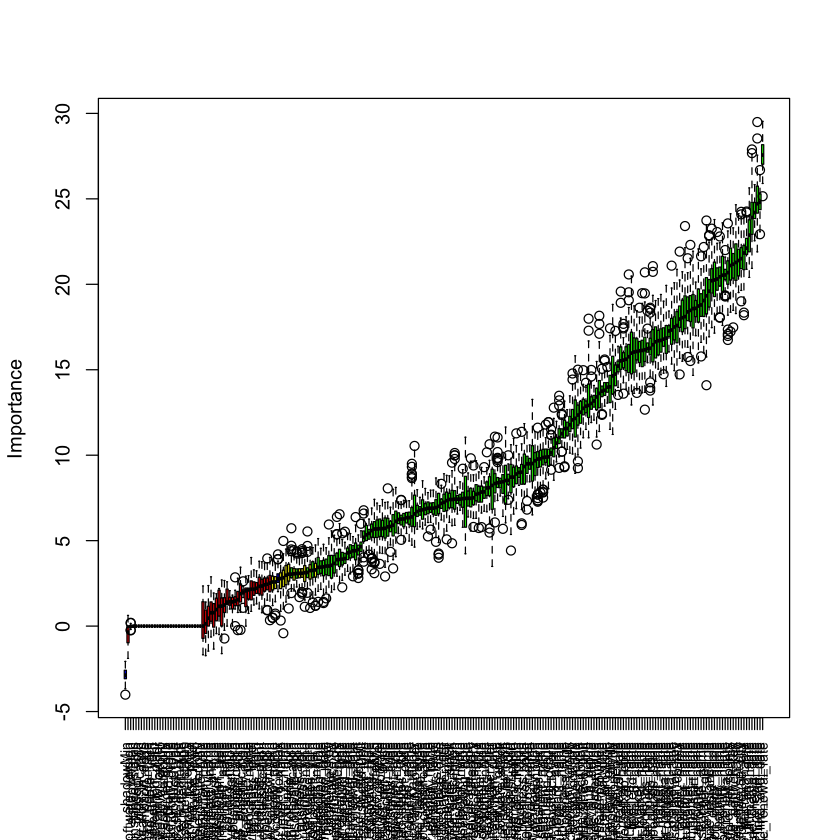

In [48]:
plot(boruta, xlab = "", xaxt = "n")
k <-lapply(1:ncol(boruta$ImpHistory),function(i)
  boruta$ImpHistory[is.finite(boruta$ImpHistory[,i]),i])
names(k) <- colnames(boruta$ImpHistory)
Labels <- sort(sapply(k,median))
axis(side = 1,las=2,labels = names(Labels),
       at = 1:ncol(boruta$ImpHistory), cex.axis = 0.7)

In [50]:
finalvars = getSelectedAttributes(boruta, withTentative = F)

In [51]:
finalvars

[1] "ibsa_main_sample_set.innovation_challenge_key"                                 
  [2] "ibsa_main_sample_set.instance_id"                                              
  [3] "ibsa_main_sample_set.major_line_instance_id"                                   
  [4] "ibsa_main_sample_set.installation_date"                                        
  [5] "ibsa_main_sample_set.product_sales_order_type"                                 
  [6] "ibsa_main_sample_set.product_purchase_order_type"                              
  [7] "ibsa_main_sample_set.product_transaction_type"                                 
  [8] "ibsa_main_sample_set.installed_product_type"                                   
  [9] "ibsa_main_sample_set.installed_product_component_yorn"                         
 [10] "ibsa_main_sample_set.component_type"                                           
 [11] "ibsa_main_sample_set.service_contract_last_renewal_date"                       
 [12] "ibsa_main_sample_set.service_contract_classification"                          
 [13] "ibsa_main_sample_set.service_contract_process_type"                            
 [14] "ibsa_main_sample_set.contract_line_multi_year_discount_yorn"                   
 [15] "ibsa_main_sample_set.contract_line_route_to_market_code"                       
 [16] "ibsa_main_sample_set.contract_line_start_date"                                 
 [17] "ibsa_main_sample_set.contract_line_end_date"                                   
 [18] "ibsa_main_sample_set.contract_line_create_date"                                
 [19] "ibsa_main_sample_set.marketing_program_name"                                   
 [20] "ibsa_main_sample_set.default_multi_year_discount_yorn"                         
 [21] "ibsa_main_sample_set.low_dollar_contract_yorn"                                 
 [22] "ibsa_main_sample_set.warranty_type"                                            
 [23] "ibsa_main_sample_set.warranty_contract_line_start_date"                        
 [24] "ibsa_main_sample_set.warranty_contract_line_end_date"                          
 [25] "ibsa_main_sample_set.product_sales_channel_code"                               
 [26] "ibsa_main_sample_set.product_bookings_measure_transaction_type"                
 [27] "ibsa_main_sample_set.product_adjustment_type"                                  
 [28] "ibsa_main_sample_set.product_channel_bookings_yorn"                            
 [29] "ibsa_main_sample_set.product_route_to_market"                                  
 [30] "ibsa_main_sample_set.service_channel_bookings_yorn"                            
 [31] "ibsa_main_sample_set.service_route_to_market_code"                             
 [32] "ibsa_main_sample_set.service_bookings_measure_transaction_type"                
 [33] "ibsa_main_sample_set.hardware_yorn"                                            
 [34] "ibsa_main_sample_set.previous_contract_line_end_date"                          
 [35] "ibsa_main_sample_set.service_offering"                                         
 [36] "ibsa_main_sample_set.service_program"                                          
 [37] "ibsa_main_sample_set.software_opportunity_type"                                
 [38] "ibsa_main_sample_set.node_name"                                                
 [39] "ibsa_main_sample_set.sales_hierarchy_level"                                    
 [40] "ibsa_main_sample_set.sub_scms_name"                                            
 [41] "ibsa_main_sample_set.level_3_name"                                             
 [42] "ibsa_main_sample_set.level_4_name"                                             
 [43] "ibsa_main_sample_set.level_5_name"                                             
 [44] "ibsa_main_sample_set.level_6_name"                                             
 [45] "ibsa_main_sample_set.service_sales_node_base_node_name"                        
 [46] "ibsa_main_sample_set.service_sales_node_base_sales_hierarchy_level"            
